In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [29]:
#X is the training data, y is the label

digits = datasets.load_digits()
X, y = digits['data'], digits['target']
n, d = X.shape
print("n=",n)
print("d=",d)

n= 1797
d= 64


### Decision Stump (depth = 1)

In [30]:
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

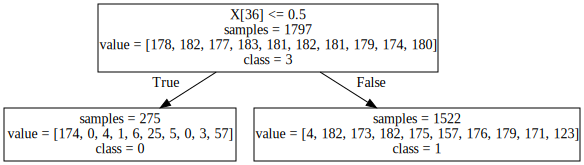

In [31]:
#Visualize decision stump

from sklearn.tree import export_graphviz
import graphviz 

graphviz.Source(export_graphviz(stump, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

#use pixel number 36 to decide
#sample = how many training data in this stump
#value = distrubution of [0,1,2,3...9]
#class = predict number (number that have is highest in value[])

In [32]:
#predict yhat using training data to calculate training error

yhat = stump.predict(X)
training_error = np.sum(yhat!=y)/n #sum boolean array
print("Training error", training_error)

Training error 0.80189204229271


### Decision Tree (depth = 2)

In [33]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

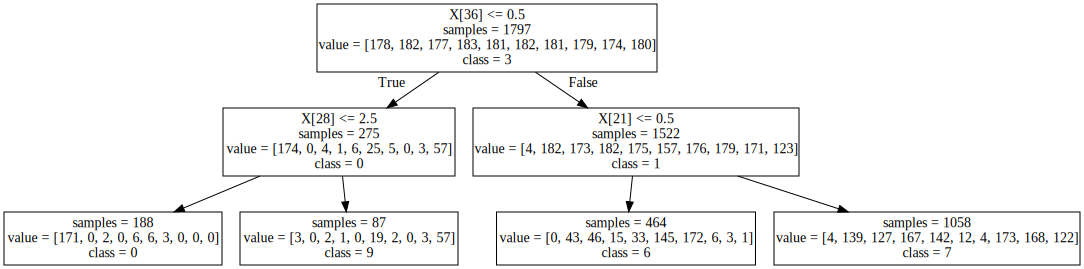

In [34]:
from sklearn.tree import export_graphviz
import graphviz 

graphviz.Source(export_graphviz(tree, out_file=None, class_names=digits.target_names.astype(str), impurity=False))

In [35]:
#predict yhat using training data to calculate training error

yhat = tree.predict(X)
training_error = np.sum(yhat!=y)/n #sum boolean array
print("Training error", training_error)

Training error 0.6811352253756261


### Training Error with respect to depth of tree

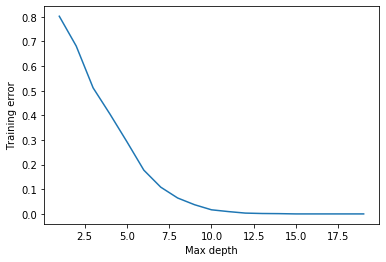

In [37]:
errors = []
depths = range(1,20)
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X,y)                   
    yhat = tree.predict(X)   #below two lines can replace by errors.append(1-tree.score(X,y))
    errors.append(np.sum(y!=yhat)/n) 
plt.plot(depths, errors) #depths array x axis, error array y-axis
plt.xlabel("Max depth")
plt.ylabel("Training error")

### Splitting Data into Training Data and Validation Data

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2) 
                                                    #test size, split how much training data into validation data

In [11]:
#Train the training data and use validation data to compute validation error

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(Xtrain,ytrain)

yhat = tree.predict(Xtest)
validation_error = np.mean(yhat!=ytest)
print("Validation error: ",validation_error)

Validation error:  0.16111111111111112


### Training Error and Testing error with respect to depth of tree

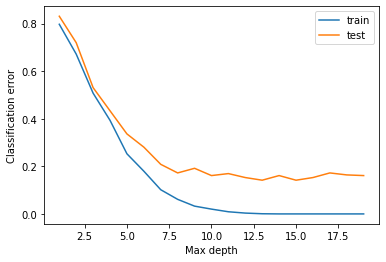

In [12]:
train_errors = []
test_errors = []
for max_depth in depths:
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(Xtrain,ytrain)
    train_errors.append(np.mean(ytrain!=tree.predict(Xtrain)))
    test_errors.append(np.mean(ytest!=tree.predict(Xtest)))
plt.plot(depths, train_errors, label="train")
plt.plot(depths, test_errors, label="test")
plt.xlabel("Max depth")
plt.ylabel("Classification error")
plt.legend();

### Plot Classifier

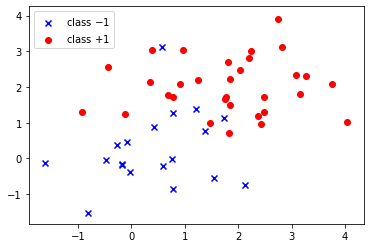

In [22]:
#fake X, y
import numpy.random as npr
N = 50
X = npr.randn(N,2)
y = npr.choice((-1,+1),size=N)
X[y>0,0] += 2
X[y>0,1] += 2

plt.scatter(X[y<0,0], X[y<0,1], color="b", marker="x", label="class $-1$")
plt.scatter(X[y>0,0], X[y>0,1], color="r", marker="o",  label="class $+1$")
plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') # remove ticks
plt.legend(loc="best")

In [23]:
# code adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
# work for d = 2
def plotClassifier(model, X, y, transformation=None, filename=None):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    x1_min, x1_max = int(x1.min()) - 1, int(x1.max()) + 1
    x2_min, x2_max = int(x2.min()) - 1, int(x2.max()) + 1

    x1_line =  np.linspace(x1_min, x1_max,200)
    x2_line =  np.linspace(x2_min, x2_max,200)

    x1_mesh, x2_mesh = np.meshgrid(x1_line, x2_line)

    mesh_data = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    
    if transformation is not None:
        mesh_data = transformation(mesh_data)
    y_pred = model.predict(mesh_data)
    y_pred = np.reshape(y_pred, x1_mesh.shape)

    plt.xlim([x1_mesh.min(), x1_mesh.max()])
    plt.ylim([x2_mesh.min(), x2_mesh.max()])

    plt.contourf(x1_mesh, x2_mesh, -y_pred, cmap=plt.cm.RdBu, alpha=0.6)

    plt.scatter(x1[y<0], x2[y<0], color="b", marker="x", label="class $-1$")
    plt.scatter(x1[y>0], x2[y>0], color="r", marker="o", label="class $+1$")
    plt.legend(loc="best")
    plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') # remove ticks
    if filename is not None:
        plt.savefig(filename)

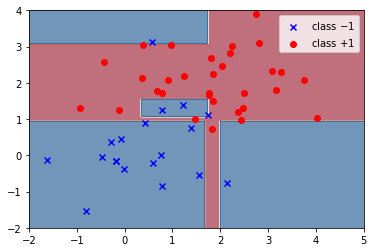

In [26]:
dt = DecisionTreeClassifier(max_depth=100)
dt.fit(X,y)
plotClassifier(dt, X, y)